In [1]:
import torch
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from typing import Tuple
import torch
import torch.optim as optim
from model import Net
model = torch.load('model_weights/modelentire.pth')
model.load_state_dict(torch.load('model_weights/model.pth'))
loss_function = nn.MSELoss()
model.eval()

Net(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=1, bias=True)
)

In [2]:
def weighted_mse(u_exp: np.ndarray, u: np.ndarray, time: np.ndarray, eps: float = + 10 ** (-15)) -> Tuple[np.ndarray, np.ndarray]:
    dt = np.diff(time, n=1, axis=0)
    dt = np.append(dt, dt[-1])
    amplitude = np.dot(dt, u * u_exp) / np.dot(dt, u ** 2)
    e = (u_exp - amplitude * u) / (u_exp + eps) * dt
    
    loss = np.dot(e, e)
    return loss



t = 1e-3 * np.array([
    0.135, 0.180, 0.235, 0.315, 0.365, 0.420,
    0.485, 0.560, 0.650, 0.750, 0.865, 1.000,
    1.155, 1.335, 1.540, 1.780, 2.055, 2.370,
    2.740, 3.160, 3.650, 4.215, 4.870, 5.625,
    6.495, 7.500, 8.660, 10.00, 11.55, 13.34,
    15.40, 17.79, 20.54, 23.72, 27.39, 31.63,
    36.52, 42.17, 48.70, 56.24, 64.94, 74.99,
    86.60, 100.0, 115.5, 133.4
])

In [3]:
df = pd.read_pickle('Dataset')
df

,Sigma,mu,d,th,th0,Decay
19628,-1.271194,-0.747548,0.0,-1.085085,0.0,"[0.19375629692752577, 0.18294351872284478, 0.1..."
2486,-0.522897,0.229992,0.0,-0.732977,0.0,"[0.192993357268207, 0.1820247479384618, 0.1711..."
64883,1.436271,-0.737692,0.0,0.091825,0.0,"[0.1752133606610032, 0.16091191549296152, 0.14..."
10027,1.629299,1.329376,0.0,-1.526841,0.0,"[0.18759459262951242, 0.17560025481240513, 0.1..."
51126,0.423736,-0.777624,0.0,-0.247653,0.0,"[0.17945400597800243, 0.1659367937378173, 0.15..."
...,...,...,...,...,...,...
69892,0.814175,0.781662,0.0,-0.878862,0.0,"[0.1882601086365116, 0.17643418646482018, 0.16..."
72626,-0.020505,-0.181898,0.0,-0.651101,0.0,"[0.18716586487573802, 0.17512817120621807, 0.1..."
17249,0.133407,1.380844,0.0,0.863656,0.0,"[0.1928662308439771, 0.18225947646392704, 0.17..."
38159,1.210575,-0.099357,0.0,1.416446,0.0,"[0.1803007929163741, 0.16759557921691812, 0.15..."


In [4]:
# i = 0
# graph_df = df.iloc[0:1000]
# fix_str = graph_df.sample(1)
# #fix_vector = np.array([fix_str.get('Sigma').iloc[0], fix_str.get('mu').iloc[0], fix_str.get('th').iloc[0]])
# x = np.array([])
# y = np.array([])
# z = np.array([])
# r = np.array([])
# for _,row in graph_df.iterrows():
#     norm_2d = np.linalg.norm([fix_str.get('Sigma').iloc[0] - row['Sigma'],
#                             fix_str.get('mu').iloc[0] - row['mu'],
#                               fix_str.get('th').iloc[0] - row['th']])
#     #the_point = [row['Sigma'],row['mu'],row['th'],norm_2d]
#     #data_for_plotting.append(the_point)
#     x = np.append(x,row.get('Sigma'))
#     y = np.append(y, row.get('mu'))
#     z = np.append(z, row.get('th'))
#     r = np.append(r,norm_2d)
# print(len(x))

In [5]:
# x = x
# X,Y = np.meshgrid(x,y)
# Z,Y = np.meshgrid(z,y)
# V = np.sin(r)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# #ax.view_init(45,60)
# ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))

In [7]:
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

device = get_device()
net = model.double().to(device)

# def appending_to_tensor(tensor, fix_vector, variable_vector):
#     tmp_tensor = torch.tensor([rand_2_strs.get('Sigma').iloc[0],rand_2_strs.get('Sigma').iloc[1],
#                                rand_2_strs.get('mu').iloc[0],rand_2_strs.get('mu').iloc[1],
#                                rand_2_strs.get('th').iloc[0],rand_2_strs.get('th').iloc[1],
#                                np.log(weighted_mse(np.array(rand_2_strs.get('Decay').iloc[0]),np.array(rand_2_strs.get('Decay').iloc[1]),t)[0])])
#     tmp_tensor = torch.unsqueeze(tmp_tensor, 0)
#     tmp_tensor = torch.cat((tensor,tmp_tensor),0)
#     return(tmp_tensor)

def mean_absolute_percentage_error(y_pred, y_true, eps=10**(-2)): 
    return abs(torch.mean(((y_true-y_pred))/(y_true + eps)))*100


# def create_batches_to_device(df, device, num_fix_string,batch_size=1):
#     tensor = torch.tensor([])
#     fix_vector = 
#     variable_vector = 
#     tensor = appending_to_tensor(tensor, rand_train_str)
#     tensor = tensor.to(device)
#     trainset = torch.utils.data.DataLoader(tensor, batch_size=batch_size, shuffle=True)
#     return (trainset)
print(device)


def l2_norm(variable_vector):
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - variable_vector[0],
                          fix_vector.get('mu').iloc[0] - variable_vector[1],
                          fix_vector.get('th').iloc[0] - variable_vector[2]])

def L(variable_vector):
    tensor = torch.tensor([fix_vector.get('Sigma').iloc[0],variable_vector[0],
                           fix_vector.get('mu').iloc[0],variable_vector[1],
                           fix_vector.get('th').iloc[0],variable_vector[2]])
    tensor = tensor.to(device)
    #print(tensor)
    #data_batch = torch.utils.data.DataLoader(tensor, batch_size=1, shuffle=False)
    #print(data_batch)
#     for data in data_batch:
#         X = data
#         print(X)
#         output = net(X.double())
#         print (output)
    output = net(tensor.double())
    #print (output.item())
    return (np.exp(output.item()))

constant = 1

def minimization_func(variable_vector):
    #variable_vector = [Sigma2, mu2, th2]
    return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )

print ('одинаковые параметры loss = ', L([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))
print ('одинаковые параметры l2_norm =', l2_norm([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))
print ('одинаковые параметры minim = ', minimization_func([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


cpu


NameError: name 'fix_vector' is not defined

In [6]:
#fix_vector = df.sample(1) временно
fix_vector = df.loc[9030]
fix_vector = pd.DataFrame(fix_vector).transpose()
print ('Зафиксировали произвольный вектор из датафрейма с компонентами \n')
fix_vector

Зафиксировали произвольный вектор из датафрейма с компонентами 



,Sigma,mu,d,th,th0,Decay
9030,-0.809753,-1.56861,0,-0.248755,0,"[0.17439216402987712, 0.15983478220067351, 0.1..."


### Нахождение границ для оптимизатора с учетом параметров усреднения первоначальной выборки

In [7]:
means = np.fromfile('means_scaler')
print(means)
stds = np.fromfile('stds_scaler')
print(stds)
a = [[stds[0]]]
b = [[1e+06-means[0]]]
sigma_min = np.linalg.solve(a,b)
print('Sigma lower bound',sigma_min)
a = [[stds[1]]]
b = [[10-means[1]]]
mu_min = np.linalg.solve(a,b)
print ('mu lower bound', mu_min)
a = [[stds[3]]]
b = [[0.650209-means[3]]]
th_min = np.linalg.solve(a,b)
print ('th lower bound', th_min)

a = [[stds[0]]]
b = [[10e+06-means[0]]]
sigma_max = np.linalg.solve(a,b)
print('Sigma upper bound',sigma_max)
a = [[stds[1]]]
b = [[150-means[1]]]
mu_max = np.linalg.solve(a,b)
print ('mu upper bound', mu_max)
a = [[stds[3]]]
b = [[11.7-means[3]]]
th_max = np.linalg.solve(a,b)
print ('th upper bound', th_max)

[5.49793364e+06 8.00354882e+01 8.90000000e+01 6.18313815e+00
 6.50000000e+00]
[2.58728391e+06 4.04162034e+01 1.00000000e+00 3.19023924e+00
 1.00000000e+00]
Sigma lower bound [[-1.73847703]]
mu lower bound [[-1.73285668]]
th lower bound [[-1.73433048]]
Sigma upper bound [[1.74007435]]
mu upper bound [[1.73110055]]
th upper bound [[1.72929409]]


## Минимизация логарифмических величин

In [11]:
constant = 1000
from scipy.optimize import minimize
x0 = np.array([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]])
#res = minimize(minimization_func, x0, method='nelder-mead')
# res = minimize(minimization_func, x0, method='BFGS',options={'disp': True, 'eps':1e-6, 'gtol':1e1})
#res = minimize(minimization_func, x0, method='BFGS',options={'disp': True})
#res = minimize(minimization_func, x0, method='CG',options={'disp': True, 'maxiter':100000})
#res = minimize(minimization_func, x0, method='powell')
res =  minimize(minimization_func, x0, method='SLSQP', bounds=((sigma_min[0][0], sigma_max[0][0]),(mu_min[0][0], mu_max[0][0]),(th_min[0][0],th_max[0][0])),options={'disp': True})
#print(res)
print ('Start vector', [fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]])
print ('Vector after minimization', res.x)
print ('Function value with start vector', minimization_func(x0))
print ('How % change loss', mean_absolute_percentage_error(torch.tensor(L(res.x)), torch.tensor(L(x0))).item())
print ('L2 norm with minim vector', l2_norm(res.x))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.280428700028562
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Start vector [-0.8097534630349149, -1.5686084526495365, -0.24875458646855458]
Vector after minimization [-1.46126883  1.73110055 -1.20922686]
Function value with start vector 0.7328583265480395
How % change loss 4.5149003309799935
L2 norm with minim vector 3.4978648826855325


## Проверяю нейросеть на сходимость

In [509]:
i = total_iter = 10
fix_vector = df.sample(1)
while(i >= 0):
    variable_vector = [fix_vector.get('Sigma').iloc[0] + (i/total_iter * fix_vector.get('Sigma').iloc[0]) ,fix_vector.get('mu').iloc[0] + (i/total_iter * fix_vector.get('mu').iloc[0]),fix_vector.get('th').iloc[0] + (i/total_iter * fix_vector.get('th').iloc[0])]
    print ('Loss is', L(variable_vector))
    i -= 1

Loss is 0.017157855027261613
Loss is 0.012227208247171543
Loss is 0.009077916284112217
Loss is 0.006459419488012133
Loss is 0.004043312465918588
Loss is 0.002492173151506337
Loss is 0.0013419683164918657
Loss is 0.0006564899268535414
Loss is 0.00027265027575578603
Loss is 5.5403060777426065e-05
Loss is 5.484248134522269e-06


In [12]:
the_result_vector = fix_vector[['Sigma', 'mu', 'd', 'th', 'th0']].copy()
the_result_vector.loc['minimize_vector'] = [res.x[0], res.x[1], 0, res.x[2], 0]
the_result_vector = the_result_vector*stds+means
the_result_vector.to_pickle('the_result_vectors_to_compare')
the_result_vector

,Sigma,mu,d,th,th0
9030,3.40287e+06,16.6383,89,5.38955,6.5
minimize_vector,1.71722e+06,150,89,2.32542,6.5


In [13]:
[the_result_vector['Sigma'].iloc[0],the_result_vector['Sigma'].iloc[1],the_result_vector['mu'].iloc[0],the_result_vector['mu'].iloc[1],
 the_result_vector['th'].iloc[0],the_result_vector['th'].iloc[1]]

[3402871.538234493,
 1717216.3179786229,
 16.638289933069103,
 149.99999998226664,
 5.389551505199457,
 2.325415178215014]

## Отошли от нейронки. Занимаемся минимизацией через модельную функцию

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from common import tool_times
from common import well_construction as wc
from common.sensor_types import sensors
from solvers.solver_cim_py.interface import Solver

In [9]:
def model_decay(d=fix_vector.get('d').iloc[0], th0=fix_vector.get('th0').iloc[0],
                th=fix_vector.get('th').iloc[0], sigma=fix_vector.get('Sigma').iloc[0], mu=fix_vector.get('mu').iloc[0]):
    tubes = [
    wc.Tube(d=d, th0=th0, th=th, sigma=sigma, mu=mu),
    ]

    sensor = sensors.PULSE_3E_1
    times = tool_times.times[sensor]
    solver = Solver(sensor, times, tool_averaging=True)
    output = solver.get_curve(tubes)
    return(output)

In [10]:
def l2_norm(variable_vector):
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - variable_vector[0],
                          fix_vector.get('mu').iloc[0] - variable_vector[1],
                          fix_vector.get('th').iloc[0] - variable_vector[2]])

def L(variable_vector):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=variable_vector[0],
                                                                             mu=variable_vector[1],
                                                                            th=variable_vector[2])),t))
def minimization_func(variable_vector, constant=1):
    #variable_vector = [Sigma2, mu2, th2]
    return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )

### Heatmap loss ( log (sigma), log (mu), log(d), log(th), log(th0)

In [115]:
# tmp_vector = df.sample(1)
# fix_vector = tmp_vector[['Sigma', 'mu', 'd', 'th', 'th0']]
# fix_vector = fix_vector*stds+means
# fix_vector['Decay'] = tmp_vector['Decay']
# print ('Зафиксировали произвольный вектор из датафрейма с компонентами \n')
fix_vector

,Sigma,mu,d,th,th0,Decay
46264,5.918848e+06,131.440554,89.0,5.905937,6.5,"[0.1929674008444241, 0.18211295759395507, 0.17..."


In [116]:
def model_decay(d=fix_vector.get('d').iloc[0], th0=fix_vector.get('th0').iloc[0],
                th=fix_vector.get('th').iloc[0], sigma=fix_vector.get('Sigma').iloc[0], mu=fix_vector.get('mu').iloc[0]):
    tubes = [
    wc.Tube(d=(d), th0=(th0), th=(th), sigma=(sigma), mu=(mu)),
    ]

    sensor = sensors.PULSE_3E_1
    times = tool_times.times[sensor]
    solver = Solver(sensor, times, tool_averaging=True)
    output = solver.get_curve(tubes)
    return(output)
def L(x,y):
    return np.log(weighted_mse(np.array(model_decay()), np.array(model_decay(sigma=x,
                                                                             mu=y)),t))

In [117]:
L(fix_vector.get('Sigma').iloc[0], fix_vector.get('mu').iloc[0])

2021-02-09 23:22:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:22:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:22:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:22:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:22:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:22:04 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:22:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:22:04 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:22:04 INFO    : multi-lu-coil-

-inf

In [118]:
size = 30
x = np.linspace(1e-06, 2 * fix_vector.get('Sigma').iloc[0], num=size, retstep=True)#sigma
y = np.linspace(1e-06, 2 * fix_vector.get('mu').iloc[0], num=size, retstep=True)#mu
i = 0
j = 0
loss = np.zeros((size,size))
while (i < size):
    while (j < size):
        loss[i][j] = L(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1

2021-02-09 23:23:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:23:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:23:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:23:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:23:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:23:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:23:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:23:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:23:20 INFO    : multi-lu-coil-

2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:23:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:23:36 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:23:36 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:23:36 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:23:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:23:51 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:23:51 INFO    : multi-lu-coil-mod

2021-02-09 23:24:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:24:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:24:06 INFO    : multi-lu-coil-mo

2021-02-09 23:24:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1e-06, mu=172.23245012899625),]
2021-02-09 23:24:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:24:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1

2021-02-09 23:24:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:24:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1e-06, mu=217.55677884715317),]
2021-02-09 23:24:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:24:34 INFO    : multi-lu-coil-modelling,

2021-02-09 23:24:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:24:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:24:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1e-06, mu=262.88110756531006),]
2021-02-09 23:24:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:24:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:24:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:24:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:24:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:24:49 INFO    : multi-lu-coil-modelling

2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=408196.42706927593, mu=36.259463974525524),]
2021-02-09 23:25:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:25:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:25:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:25:05 INFO    : multi-lu-coil-modelling, (interface.

2021-02-09 23:25:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=408196.42706927593, mu=81.58379269268244),]
2021-02-09 23:25:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:25:20 INFO    : multi-lu-coil-mo

2021-02-09 23:25:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:25:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:25:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:25:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:25:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:25:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:25:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:25:48 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:25:48 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:25:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:25:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:25:48 INFO    : multi-lu-co

2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:26:02 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:26:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:26:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:26:03 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:26:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:26:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:26:19 INFO    : multi-lu-coil-mo

2021-02-09 23:26:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=816392.8541375519, mu=27.194598230894147),]
2021-02-09 23:26:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:26:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:26:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:26:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:26:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=816392.8541375519, mu=72.51892694905105),]
2021-02-09 23:26:46 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:26:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:26:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:26:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:26:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:26:47 INFO    : multi-lu-coi

2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=816392.8541375519, mu=117.84325566720796),]
2021-02-09 23:27:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:27:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:27:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:27:03 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:27:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=816392.8541375519, mu=163.16758438536488),]
2021-02-09 23:27:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:27:18 INFO    : multi-lu-coil-mo

2021-02-09 23:27:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:27:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:27:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:27:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:27:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:27:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:27:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:27:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:27:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:27:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:27:47 INFO    : multi-lu-co

2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:28:00 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:02 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:28:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:28:17 INFO    : multi-lu-coil-mo

2021-02-09 23:28:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1224589.2812058278, mu=108.77838992357658),]
2021-02-09 23:28:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-09 23:28:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:28:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1224589.2812058278, mu=154.10271864173347),]
2021-02-09 23:28:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:28:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:46 INFO    : multi-lu-c

2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1224589.2812058278, mu=199.4270473598904),]
2021-02-09 23:28:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:00 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:29:00 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:00 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:29:12 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1224589.2812058278, mu=244.7513760780473),]
2021-02-09 23:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:15 INFO    : multi-lu-coil-mo

2021-02-09 23:29:27 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:29:27 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:29:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:29:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:29:42 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:29:42 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:43 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:29:43 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:43 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:29:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:29:43 INFO    : multi-lu-co

2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:29:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:29:58 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:29:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:29:58 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:30:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:30:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:30:12 INFO    : multi-lu-coil-mo

2021-02-09 23:30:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1632785.7082741037, mu=190.36218161625902),]
2021-02-09 23:30:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:30:26 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-09 23:30:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:30:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:30:39 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=1632785.7082741037, mu=235.6865103344159),]
2021-02-09 23:30:39 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:30:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:30:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:30:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:30:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:30:40 INFO    : multi-lu-co

2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2040982.1353423796, mu=9.06486674363138),]
2021-02-09 23:30:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:30:55 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:30:55 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:30:55 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:31:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2040982.1353423796, mu=54.38919546178829),]
2021-02-09 23:31:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:31:09 INFO    : multi-lu-coil-mo

2021-02-09 23:31:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:31:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:31:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:31:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:31:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:31:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:31:35 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:31:37 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:31:37 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:31:37 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:31:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:31:37 INFO    : multi-lu-co

2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:31:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:31:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:31:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:31:52 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:32:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:32:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:32:07 INFO    : multi-lu-coil-mo

2021-02-09 23:32:19 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2449178.5624106554, mu=1e-06),]
2021-02-09 23:32:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:32:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1

2021-02-09 23:32:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:32:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:32:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2449178.5624106554, mu=45.3243297181569),]
2021-02-09 23:32:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:32:36 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:32:36 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:32:36 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:32:36 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:32:36 INFO    : multi-lu-coi

2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2449178.5624106554, mu=90.64865843631381),]
2021-02-09 23:32:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:32:51 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:32:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:32:51 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:33:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2449178.5624106554, mu=135.97298715447073),]
2021-02-09 23:33:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:33:09 INFO    : multi-lu-coil-m

2021-02-09 23:33:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:33:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:33:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:33:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:33:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:33:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:33:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:33:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:33:41 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:33:41 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:33:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:33:41 INFO    : multi-lu-co

2021-02-09 23:33:55 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:33:56 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:33:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:33:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:33:56 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:33:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:33:57 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:34:09 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:34:12 INFO    : multi-lu-coil-mo

2021-02-09 23:34:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2857374.9894789313, mu=81.58379269268244),]
2021-02-09 23:34:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:34:26 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:34:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:34:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:34:39 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2857374.9894789313, mu=126.90812141083934),]
2021-02-09 23:34:39 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:34:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:34:41 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:34:41 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:34:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:34:41 INFO    : multi-lu-c

2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2857374.9894789313, mu=172.23245012899625),]
2021-02-09 23:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:34:56 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:34:56 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:34:56 INFO    : multi-lu-coil-modelling, (interface.

2021-02-09 23:35:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=2857374.9894789313, mu=217.55677884715317),]
2021-02-09 23:35:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:35:11 INFO    : multi-lu-coil-m

2021-02-09 23:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:35:25 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:35:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:35:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:35:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:35:38 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:35:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:35:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:35:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:35:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:35:40 INFO    : multi-lu-co

2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:35:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:35:55 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:35:55 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:35:55 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:36:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:36:10 INFO    : multi-lu-coil-mo

2021-02-09 23:36:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=3265571.416547207, mu=163.16758438536488),]
2021-02-09 23:36:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:36:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:36:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:36:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:36:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=3265571.416547207, mu=208.49191310352177),]
2021-02-09 23:36:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:36:38 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:36:38 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:36:38 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:36:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:36:38 INFO    : multi-lu-co

2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=3265571.416547207, mu=253.8162418216787),]
2021-02-09 23:36:52 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:36:53 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:36:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:36:53 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:37:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=3673767.843615483, mu=27.194598230894147),]
2021-02-09 23:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:37:08 INFO    : multi-lu-coil-mo

2021-02-09 23:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:37:36 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:37:36 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:37:36 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:37:36 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:37:37 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:37:37 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:37:37 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:37:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:37:37 INFO    : multi-lu-co

2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:37:51 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:37:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:37:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:37:52 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:38:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:38:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:38:08 INFO    : multi-lu-coil-mo

2021-02-09 23:38:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=3673767.843615483, mu=244.7513760780473),]
2021-02-09 23:38:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:38:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

2021-02-09 23:38:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:38:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:38:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4081964.270683759, mu=18.129732487262764),]
2021-02-09 23:38:35 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:38:37 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:38:37 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:38:37 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:38:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:38:37 INFO    : multi-lu-co

2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4081964.270683759, mu=63.45406120541967),]
2021-02-09 23:38:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:38:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:38:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:38:52 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4081964.270683759, mu=108.77838992357658),]
2021-02-09 23:39:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:39:07 INFO    : multi-lu-coil-mo

2021-02-09 23:39:19 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:39:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:39:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:39:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:39:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:39:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:39:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:39:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:39:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:39:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:39:35 INFO    : multi-lu-co

2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:39:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:39:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:39:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:39:50 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:40:02 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:40:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:40:05 INFO    : multi-lu-coil-mo

2021-02-09 23:40:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4490160.697752035, mu=54.38919546178829),]
2021-02-09 23:40:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:40:19 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

2021-02-09 23:40:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:40:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:40:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4490160.697752035, mu=99.7135241799452),]
2021-02-09 23:40:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:40:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:40:34 INFO    : multi-lu-coil

2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4490160.697752035, mu=145.0378528981021),]
2021-02-09 23:40:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:40:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:40:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:40:49 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:41:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4490160.697752035, mu=190.36218161625902),]
2021-02-09 23:41:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:41:04 INFO    : multi-lu-coil-mo

2021-02-09 23:41:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:41:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:41:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:41:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:41:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:41:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:41:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:41:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:41:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:41:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:41:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:41:34 INFO    : multi-lu-co

2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:41:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:41:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:41:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:41:50 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:42:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:42:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:42:07 INFO    : multi-lu-coil-mo

2021-02-09 23:42:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4898357.124820312, mu=135.97298715447073),]
2021-02-09 23:42:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:42:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:42:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:42:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:42:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4898357.124820312, mu=181.29731587262762),]
2021-02-09 23:42:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:42:39 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:42:39 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:42:39 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:42:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:42:39 INFO    : multi-lu-co

2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=4898357.124820312, mu=226.62164459078454),]
2021-02-09 23:42:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:42:55 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:42:55 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:42:55 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:43:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5306553.551888587, mu=1e-06),]
2021-02-09 23:43:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:43:11 INFO    : multi-lu-coil-modelling, (int

2021-02-09 23:43:25 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:43:25 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:43:27 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:43:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:43:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:43:42 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:43:42 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:43:43 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:43:43 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:43:43 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:43:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:43:43 INFO    : multi-lu-co

2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:43:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:43:59 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:43:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:43:59 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:44:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:44:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:44:16 INFO    : multi-lu-coil-mo

2021-02-09 23:44:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5306553.551888587, mu=217.55677884715317),]
2021-02-09 23:44:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:44:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:44:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:44:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:44:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5306553.551888587, mu=262.88110756531006),]
2021-02-09 23:44:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:44:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:44:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:44:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:44:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:44:47 INFO    : multi-lu-co

2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5714749.978956863, mu=36.259463974525524),]
2021-02-09 23:45:02 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:45:04 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:45:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:45:04 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:45:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5714749.978956863, mu=81.58379269268244),]
2021-02-09 23:45:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:45:20 INFO    : multi-lu-coil-mod

2021-02-09 23:45:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:45:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:45:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:45:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:45:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:45:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:45:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:45:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:45:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:45:52 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:45:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:45:52 INFO    : multi-lu-co

2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:46:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:46:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:46:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:46:08 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:46:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:46:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:46:24 INFO    : multi-lu-coil-mo

2021-02-09 23:46:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6122946.406025139, mu=27.194598230894147),]
2021-02-09 23:46:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:46:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:46:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:46:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:46:52 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6122946.406025139, mu=72.51892694905105),]
2021-02-09 23:46:52 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:46:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:46:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:46:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:46:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:46:54 INFO    : multi-lu-coi

2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6122946.406025139, mu=117.84325566720796),]
2021-02-09 23:47:09 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:47:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:47:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:47:10 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:47:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6122946.406025139, mu=163.16758438536488),]
2021-02-09 23:47:25 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:47:27 INFO    : multi-lu-coil-mo

2021-02-09 23:47:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:47:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:47:42 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:47:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:47:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:47:56 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:47:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:47:58 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:47:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:47:58 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:47:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:47:58 INFO    : multi-lu-co

2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:48:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:48:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:48:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:48:15 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:48:27 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:48:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:48:31 INFO    : multi-lu-coil-mo

2021-02-09 23:48:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6531142.833093415, mu=108.77838992357658),]
2021-02-09 23:48:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:48:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:49:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:49:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:49:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6531142.833093415, mu=154.10271864173347),]
2021-02-09 23:49:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:49:02 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:49:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:49:02 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:49:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:49:02 INFO    : multi-lu-co

2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6531142.833093415, mu=199.4270473598904),]
2021-02-09 23:49:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:49:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:49:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:49:18 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:49:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6531142.833093415, mu=244.7513760780473),]
2021-02-09 23:49:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:49:34 INFO    : multi-lu-coil-mod

2021-02-09 23:49:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:49:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:49:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:50:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:50:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:50:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:50:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:50:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:50:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:50:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:50:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:50:06 INFO    : multi-lu-co

2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:50:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:50:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:50:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:50:22 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:50:35 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:50:36 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:50:38 INFO    : multi-lu-coil-mo

2021-02-09 23:50:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6939339.260161691, mu=190.36218161625902),]
2021-02-09 23:50:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:50:51 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:51:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:51:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:51:05 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=6939339.260161691, mu=235.6865103344159),]
2021-02-09 23:51:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:51:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:51:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:51:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:51:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:51:06 INFO    : multi-lu-coi

2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7347535.687229967, mu=9.06486674363138),]
2021-02-09 23:51:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:51:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:51:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:51:21 INFO    : multi-lu-coil-modelling, (interface.py 

2021-02-09 23:51:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7347535.687229967, mu=54.38919546178829),]
2021-02-09 23:51:35 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:51:37 INFO    : multi-lu-coil-mod

2021-02-09 23:51:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:51:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:51:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:52:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:52:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:52:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:52:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:52:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:52:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:52:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:52:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:52:05 INFO    : multi-lu-co

2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:52:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:52:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:52:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:52:21 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:52:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:52:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:52:36 INFO    : multi-lu-coil-mo

2021-02-09 23:52:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7755732.114298243, mu=1e-06),]
2021-02-09 23:52:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:52:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-09 23:53:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:53:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:53:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7755732.114298243, mu=45.3243297181569),]
2021-02-09 23:53:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:53:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:53:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:53:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:53:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:53:05 INFO    : multi-lu-coil

2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7755732.114298243, mu=90.64865843631381),]
2021-02-09 23:53:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:53:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:53:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:53:20 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:53:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=7755732.114298243, mu=135.97298715447073),]
2021-02-09 23:53:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:53:35 INFO    : multi-lu-coil-mo

2021-02-09 23:53:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:53:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:53:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:54:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:54:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:54:02 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:54:02 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:54:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:54:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:54:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:54:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:54:03 INFO    : multi-lu-co

2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:54:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:54:19 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:54:19 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:54:19 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:54:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:54:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:54:33 INFO    : multi-lu-coil-mo

2021-02-09 23:54:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8163928.5413665185, mu=81.58379269268244),]
2021-02-09 23:54:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:54:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:55:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:55:00 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8163928.5413665185, mu=126.90812141083934),]
2021-02-09 23:55:00 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:55:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:55:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:55:02 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:55:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:02 INFO    : multi-lu-c

2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8163928.5413665185, mu=172.23245012899625),]
2021-02-09 23:55:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:55:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:55:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:55:16 INFO    : multi-lu-coil-modelling, (interface.

2021-02-09 23:55:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8163928.5413665185, mu=217.55677884715317),]
2021-02-09 23:55:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:55:31 INFO    : multi-lu-coil-m

2021-02-09 23:55:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:55:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:55:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:55:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:55:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:55:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:55:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:56:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:56:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:01 INFO    : multi-lu-co

2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:56:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:56:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:16 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:56:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:56:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:31 INFO    : multi-lu-coil-mo

2021-02-09 23:56:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8572124.968434794, mu=163.16758438536488),]
2021-02-09 23:56:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:56:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:56:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:56:57 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8572124.968434794, mu=208.49191310352177),]
2021-02-09 23:56:57 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:56:59 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:56:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:56:59 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:56:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:56:59 INFO    : multi-lu-co

2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8572124.968434794, mu=253.8162418216787),]
2021-02-09 23:57:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:57:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:57:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:57:16 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:57:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8980321.39550307, mu=27.194598230894147),]
2021-02-09 23:57:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:57:32 INFO    : multi-lu-coil-mod

2021-02-09 23:57:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:57:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:57:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:57:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:57:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:57:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:57:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:58:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:58:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:01 INFO    : multi-lu-co

2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:58:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:58:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:16 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-09 23:58:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:58:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:31 INFO    : multi-lu-coil-mo

2021-02-09 23:58:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=8980321.39550307, mu=244.7513760780473),]
2021-02-09 23:58:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:58:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma

2021-02-09 23:58:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:58:58 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9388517.822571347, mu=18.129732487262764),]
2021-02-09 23:58:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:58:59 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:58:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:58:59 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:58:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:58:59 INFO    : multi-lu-co

2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9388517.822571347, mu=63.45406120541967),]
2021-02-09 23:59:12 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:59:14 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:59:14 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:59:14 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-09 23:59:25 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9388517.822571347, mu=108.77838992357658),]
2021-02-09 23:59:27 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:59:28 INFO    : multi-lu-coil-mo

2021-02-09 23:59:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:59:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:59:41 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-09 23:59:55 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:59:55 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-09 23:59:55 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-09 23:59:55 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-09 23:59:56 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-09 23:59:56 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-09 23:59:56 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-09 23:59:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-09 23:59:56 INFO    : multi-lu-co

2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:00:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:00:11 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:00:11 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:00:11 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:00:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:00:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:00:26 INFO    : multi-lu-coil-mo

2021-02-10 00:00:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9796714.249639623, mu=54.38919546178829),]
2021-02-10 00:00:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:00:39 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

2021-02-10 00:00:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:00:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:00:52 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9796714.249639623, mu=99.7135241799452),]
2021-02-10 00:00:52 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:00:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:00:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:00:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:00:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:00:54 INFO    : multi-lu-coil

2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9796714.249639623, mu=145.0378528981021),]
2021-02-10 00:01:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:01:09 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:01:09 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:01:09 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-10 00:01:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=9796714.249639623, mu=190.36218161625902),]
2021-02-10 00:01:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:01:24 INFO    : multi-lu-coil-mo

2021-02-10 00:01:36 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:01:36 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:01:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-10 00:01:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:01:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:01:51 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:01:51 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:01:53 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:01:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:01:53 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:01:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:01:53 INFO    : multi-lu-co

2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:02:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:02:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:02:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:02:07 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:02:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:02:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:02:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:02:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:02:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:02:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:02:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:02:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:02:22 INFO    : multi-lu-coil-mo

2021-02-10 00:02:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10204910.6767079, mu=135.97298715447073),]
2021-02-10 00:02:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

2021-02-10 00:02:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:02:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:02:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10204910.6767079, mu=181.29731587262762),]
2021-02-10 00:02:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:02:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:02:50 INFO    : multi-lu-coi

2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10204910.6767079, mu=226.62164459078454),]
2021-02-10 00:03:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:03:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:03:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:03:05 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-10 00:03:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10613107.103776174, mu=1e-06),]
2021-02-10 00:03:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:03:20 INFO    : multi-lu-coil-modelling, (in

2021-02-10 00:03:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:03:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:03:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-10 00:03:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:03:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:03:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:03:46 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:03:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:03:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:03:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:03:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:03:48 INFO    : multi-lu-co

2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:04:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:04:02 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:04:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:02 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:04:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:04:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:04:17 INFO    : multi-lu-coil-mo

2021-02-10 00:04:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10613107.103776174, mu=217.55677884715317),]
2021-02-10 00:04:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:04:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-10 00:04:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:04:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=10613107.103776174, mu=262.88110756531006),]
2021-02-10 00:04:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:04:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:04:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:04:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:45 INFO    : multi-lu-c

2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11021303.53084445, mu=36.259463974525524),]
2021-02-10 00:04:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:00 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:05:00 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:00 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:05:12 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11021303.53084445, mu=81.58379269268244),]
2021-02-10 00:05:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:15 INFO    : multi-lu-coil-mod

2021-02-10 00:05:27 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:05:27 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:05:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-10 00:05:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:05:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:05:42 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:05:42 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:44 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:05:44 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:44 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:05:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:05:44 INFO    : multi-lu-co

2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:05:57 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:05:59 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:05:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:05:59 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:06:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:06:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:06:15 INFO    : multi-lu-coil-mo

2021-02-10 00:06:27 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11429499.957912726, mu=27.194598230894147),]
2021-02-10 00:06:27 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:06:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-10 00:06:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:06:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:06:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11429499.957912726, mu=72.51892694905105),]
2021-02-10 00:06:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:06:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:06:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:06:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:06:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:06:45 INFO    : multi-lu-co

2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11429499.957912726, mu=117.84325566720796),]
2021-02-10 00:06:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:07:00 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:07:00 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:07:00 INFO    : multi-lu-coil-modelling, (interface.

2021-02-10 00:07:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11429499.957912726, mu=163.16758438536488),]
2021-02-10 00:07:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:07:16 INFO    : multi-lu-coil-m

2021-02-10 00:07:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:07:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:07:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-10 00:07:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:07:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:07:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:07:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:07:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:07:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:07:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:07:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:07:46 INFO    : multi-lu-co

2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:08:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:08:02 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:08:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:08:02 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:08:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-10 00:08:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:08:18 INFO    : multi-lu-coil-mo

2021-02-10 00:08:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11837696.384981003, mu=108.77838992357658),]
2021-02-10 00:08:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:08:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-10 00:08:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:08:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:08:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11837696.384981003, mu=154.10271864173347),]
2021-02-10 00:08:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:08:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:08:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:08:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:08:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:08:49 INFO    : multi-lu-c

2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11837696.384981003, mu=199.4270473598904),]
2021-02-10 00:09:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:09:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:09:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:09:06 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-10 00:09:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=11837696.384981003, mu=244.7513760780473),]
2021-02-10 00:09:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-10 00:09:22 INFO    : multi-lu-coil-mo

In [119]:
log_loss = pd.DataFrame(loss)
log_loss.index = np.around(x,1) 
log_loss.columns = np.around(y,3)
log_loss

,0.000,9.065,18.130,27.195,36.259,45.324,54.389,63.454,72.519,81.584,...,181.297,190.362,199.427,208.492,217.557,226.622,235.687,244.751,253.816,262.881
0.0,-6.4382,-6.440607,-6.441044,-6.441386,-6.441666,-6.441902,-6.442104,-6.442279,-6.442433,-6.442570,...,-6.443454,-6.443503,-6.443549,-6.443593,-6.443634,-6.443672,-6.443709,-6.443743,-6.443776,-6.443807
408196.4,-6.4382,-6.441932,-6.442502,-6.442939,-6.443293,-6.443588,-6.443839,-6.444057,-6.444248,-6.444417,...,-6.445536,-6.445601,-6.445663,-6.445721,-6.445777,-6.445830,-6.445881,-6.445930,-6.445977,-6.446022
816392.9,-6.4382,-6.443729,-6.444484,-6.445062,-6.445532,-6.445929,-6.446272,-6.446573,-6.446843,-6.447087,...,-6.448933,-6.449062,-6.449189,-6.449312,-6.449433,-6.449553,-6.449670,-6.449786,-6.449901,-6.450015
1224589.3,-6.4382,-6.446070,-6.447083,-6.447868,-6.448521,-6.449086,-6.449587,-6.450042,-6.450460,-6.450851,...,-6.454382,-6.454685,-6.454989,-6.455297,-6.455608,-6.455924,-6.456245,-6.456573,-6.456907,-6.457249
1632785.7,-6.4382,-6.449043,-6.450411,-6.451498,-6.452430,-6.453262,-6.454024,-6.454737,-6.455416,-6.456070,...,-6.463179,-6.463912,-6.464674,-6.465468,-6.466298,-6.467169,-6.468084,-6.469049,-6.470069,-6.471149
2040982.1,-6.4382,-6.452750,-6.454607,-6.456129,-6.457477,-6.458720,-6.459896,-6.461033,-6.462148,-6.463257,...,-6.477834,-6.479640,-6.481583,-6.483679,-6.485948,-6.488411,-6.491091,-6.494011,-6.497196,-6.500673
2449178.6,-6.4382,-6.457316,-6.459842,-6.461985,-6.463945,-6.465810,-6.467632,-6.469447,-6.471281,-6.473159,...,-6.503533,-6.508044,-6.513054,-6.518628,-6.524834,-6.531743,-6.539428,-6.547963,-6.557424,-6.567885
2857375.0,-6.4382,-6.462895,-6.466336,-6.469354,-6.472206,-6.475004,-6.477822,-6.480712,-6.483721,-6.486894,...,-6.551065,-6.562172,-6.574770,-6.589029,-6.605125,-6.623233,-6.643527,-6.666177,-6.691348,-6.719197
3265571.4,-6.4382,-6.469680,-6.474365,-6.478613,-6.482755,-6.486946,-6.491292,-6.495884,-6.500813,-6.506175,...,-6.641709,-6.667800,-6.697678,-6.731736,-6.770365,-6.813957,-6.862897,-6.917558,-6.978300,-7.045454
3673767.8,-6.4382,-6.477909,-6.484283,-6.490256,-6.496263,-6.502527,-6.509223,-6.516520,-6.524605,-6.533691,...,-6.815597,-6.873851,-6.941040,-7.018128,-7.106114,-7.206013,-7.318817,-7.445395,-7.586307,-7.741428


In [11]:
#log_loss.to_pickle('./log_loss_model_matrix.pkl')
log_loss = pd.read_pickle('./log_loss_model_matrix.pkl')


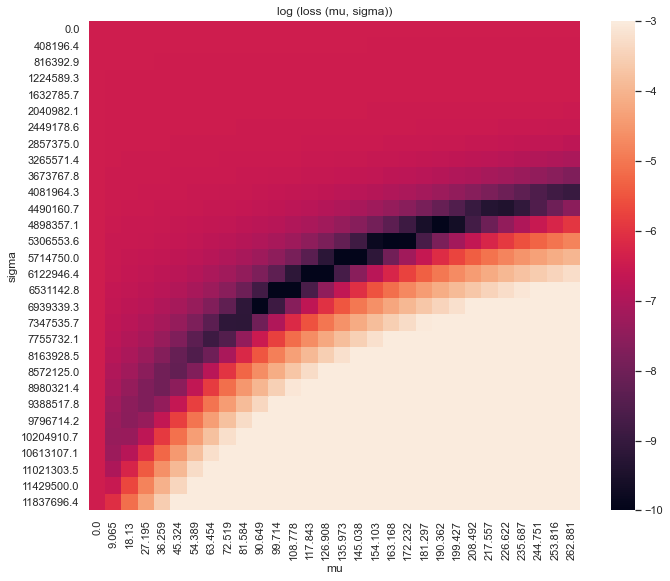

In [12]:
import seaborn as sns; sns.set_theme()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(log_loss, annot=False, vmin=-10, vmax=-3)
#name = 'log( loss( (' + str(fix_vector.get('mu').iloc[0])+ ', (' + str(fix_vector.get('Sigma').iloc[0]) + ')))'
name = "log (loss (mu, sigma))"
ax.set(xlabel='mu', ylabel='sigma', title=name)
# ax = f.gca()
# circle1 = plt.Circle((size/2,size/2), 0.5, color='g', fill=False, label="The zone of the fix vector")
# ax.add_patch(circle1)
# ax.legend()
f.savefig("log_loss((Sigma), (mu))")

In [13]:
loss = np.exp(log_loss)
loss

,0.000,9.065,18.130,27.195,36.259,45.324,54.389,63.454,72.519,81.584,...,181.297,190.362,199.427,208.492,217.557,226.622,235.687,244.751,253.816,262.881
0.0,0.001599,0.001595,0.001595,0.001594,0.001594,0.001593,0.001593,0.001593,0.001593,0.001592,...,0.001591,0.001591,0.001591,0.001591,0.001591,0.001591,0.001590,0.001590,0.001590,0.001590
408196.4,0.001599,0.001593,0.001592,0.001592,0.001591,0.001591,0.001590,0.001590,0.001590,0.001589,...,0.001588,0.001587,0.001587,0.001587,0.001587,0.001587,0.001587,0.001587,0.001587,0.001587
816392.9,0.001599,0.001590,0.001589,0.001588,0.001588,0.001587,0.001586,0.001586,0.001586,0.001585,...,0.001582,0.001582,0.001582,0.001582,0.001581,0.001581,0.001581,0.001581,0.001581,0.001580
1224589.3,0.001599,0.001587,0.001585,0.001584,0.001583,0.001582,0.001581,0.001580,0.001580,0.001579,...,0.001574,0.001573,0.001573,0.001572,0.001572,0.001571,0.001571,0.001570,0.001570,0.001569
1632785.7,0.001599,0.001582,0.001580,0.001578,0.001577,0.001575,0.001574,0.001573,0.001572,0.001571,...,0.001560,0.001559,0.001557,0.001556,0.001555,0.001554,0.001552,0.001551,0.001549,0.001547
2040982.1,0.001599,0.001576,0.001573,0.001571,0.001569,0.001567,0.001565,0.001563,0.001561,0.001560,...,0.001537,0.001534,0.001531,0.001528,0.001525,0.001521,0.001517,0.001512,0.001508,0.001502
2449178.6,0.001599,0.001569,0.001565,0.001562,0.001559,0.001556,0.001553,0.001550,0.001547,0.001544,...,0.001498,0.001491,0.001484,0.001476,0.001467,0.001456,0.001445,0.001433,0.001420,0.001405
2857375.0,0.001599,0.001560,0.001555,0.001550,0.001546,0.001541,0.001537,0.001533,0.001528,0.001523,...,0.001429,0.001413,0.001395,0.001375,0.001353,0.001329,0.001302,0.001273,0.001242,0.001208
3265571.4,0.001599,0.001550,0.001542,0.001536,0.001530,0.001523,0.001517,0.001510,0.001502,0.001494,...,0.001305,0.001271,0.001234,0.001192,0.001147,0.001098,0.001046,0.000990,0.000932,0.000871
3673767.8,0.001599,0.001537,0.001527,0.001518,0.001509,0.001500,0.001490,0.001479,0.001467,0.001454,...,0.001097,0.001034,0.000967,0.000896,0.000820,0.000742,0.000663,0.000584,0.000507,0.000434


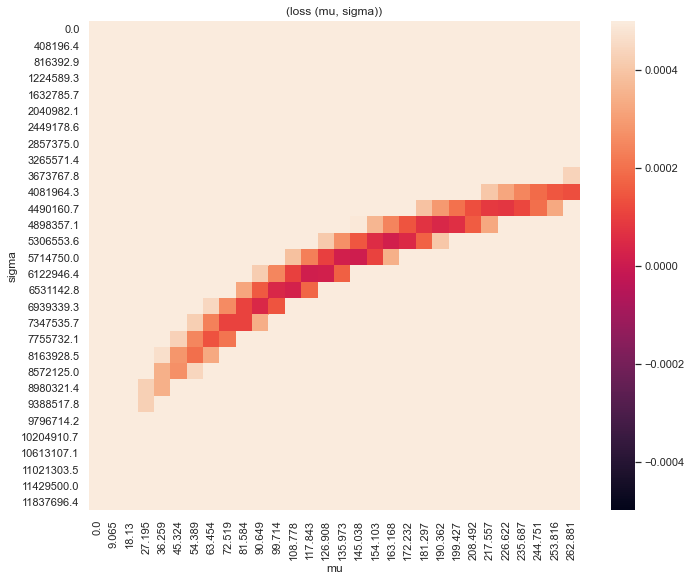

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(loss, annot=False, vmin=-0.0005, vmax=0.0005)
#name = 'log( loss( (' + str(fix_vector.get('mu').iloc[0])+ ', (' + str(fix_vector.get('Sigma').iloc[0]) + ')))'
name = "(loss (mu, sigma))"
ax.set(xlabel='mu', ylabel='sigma', title=name)
# ax = f.gca()
# circle1 = plt.Circle((size/2,size/2), 0.5, color='g', fill=False, label="The zone of the fix vector")
# ax.add_patch(circle1)
# ax.legend()
f.savefig("loss((Sigma), (mu))")

### Heatmap L2_norm (sigma, mu)

#### Нормируем Sigma, mu параметрами из StandardScaler

In [22]:
size = 30
x = np.linspace(1e-06, 2 * fix_vector.get('Sigma').iloc[0], num=size, retstep=False)#sigma
y = np.linspace(1e-06, 2 * fix_vector.get('mu').iloc[0], num=size, retstep=False)#mu
x_norm = (x - means[0])/stds[0]
y_norm = (y - means[1])/stds[1]

In [26]:
x_norm

array([-2.12498274, -2.12498276, -2.12498278, -2.1249828 , -2.12498283,
       -2.12498285, -2.12498287, -2.12498289, -2.12498291, -2.12498293,
       -2.12498296, -2.12498298, -2.124983  , -2.12498302, -2.12498304,
       -2.12498306, -2.12498308, -2.12498311, -2.12498313, -2.12498315,
       -2.12498317, -2.12498319, -2.12498321, -2.12498324, -2.12498326,
       -2.12498328, -2.1249833 , -2.12498332, -2.12498334, -2.12498337])

In [322]:
def L2_norm(variable_vector):
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - variable_vector[0],
                          tmp_vector.get('mu').iloc[0] - variable_vector[1]])
i = 0
j = 0
l2_norm = np.zeros((size,size))
while (i < size):
    while (j < size):
        l2_norm[i][j] = L2_norm([x_norm[i],y_norm[j]])
        j = j + 1
    j = 0
    i = i + 1

In [323]:
l2_norm = pd.DataFrame(-(l2_norm))
l2_norm.index = np.around(x_norm,1) 
l2_norm.columns = np.around(y_norm,3)
l2_norm

,-1.980,-1.756,-1.532,-1.307,-1.083,-0.859,-0.635,-0.410,-0.186,0.038,...,2.505,2.730,2.954,3.178,3.403,3.627,3.851,4.075,4.300,4.524
-2.1,-3.976188,-3.794934,-3.618507,-3.447647,-3.283224,-3.126253,-2.977913,-2.839558,-2.712714,-2.599068,...,-2.599068,-2.712714,-2.839558,-2.977913,-3.126253,-3.283224,-3.447647,-3.618507,-3.794934,-3.976188
-2.0,-3.887558,-3.701968,-3.520885,-3.345043,-3.175311,-3.012723,-2.858498,-2.714061,-2.581057,-2.461340,...,-2.461340,-2.581057,-2.714061,-2.858498,-3.012723,-3.175311,-3.345043,-3.520885,-3.701968,-3.887558
-1.8,-3.803410,-3.613501,-3.427748,-3.246865,-3.071713,-2.903329,-2.742960,-2.592094,-2.452484,-2.326159,...,-2.326159,-2.452484,-2.592094,-2.742960,-2.903329,-3.071713,-3.246865,-3.427748,-3.613501,-3.803410
-1.7,-3.724048,-3.529871,-3.339470,-3.153528,-2.972882,-2.798558,-2.631812,-2.474178,-2.327506,-2.193997,...,-2.193997,-2.327506,-2.474178,-2.631812,-2.798558,-2.972882,-3.153528,-3.339470,-3.529872,-3.724048
-1.5,-3.649784,-3.451432,-3.256447,-3.065473,-2.879308,-2.698947,-2.525633,-2.360920,-2.206733,-2.065432,...,-2.065432,-2.206733,-2.360920,-2.525633,-2.698947,-2.879308,-3.065473,-3.256447,-3.451432,-3.649784
-1.3,-3.580935,-3.378543,-3.179091,-2.983169,-2.791521,-2.605088,-2.425076,-2.253023,-2.090895,-1.941180,...,-1.941181,-2.090895,-2.253023,-2.425076,-2.605088,-2.791521,-2.983169,-3.179091,-3.378543,-3.580935
-1.2,-3.517819,-3.311571,-3.107825,-2.907104,-2.710081,-2.517626,-2.330869,-2.151294,-1.980857,-1.822124,...,-1.822124,-1.980858,-2.151294,-2.330869,-2.517626,-2.710081,-2.907104,-3.107825,-3.311571,-3.517819
-1.0,-3.460749,-3.250883,-3.043076,-2.837779,-2.635579,-2.437248,-2.243810,-2.056649,-1.877640,-1.709349,...,-1.709349,-1.877640,-2.056649,-2.243810,-2.437248,-2.635579,-2.837779,-3.043076,-3.250883,-3.460749
-0.9,-3.410030,-3.196836,-2.985269,-2.775700,-2.568618,-2.364677,-2.164764,-1.970108,-1.782429,-1.604180,...,-1.604180,-1.782429,-1.970108,-2.164764,-2.364677,-2.568618,-2.775700,-2.985269,-3.196836,-3.410030
-0.7,-3.365948,-3.149772,-2.934814,-2.721362,-2.509801,-2.300652,-2.094638,-1.892783,-1.696572,-1.508209,...,-1.508209,-1.696572,-1.892783,-2.094638,-2.300652,-2.509801,-2.721362,-2.934814,-3.149772,-3.365948


In [324]:
l2_norm.to_pickle('./l2_norm_model_matrix.pkl')

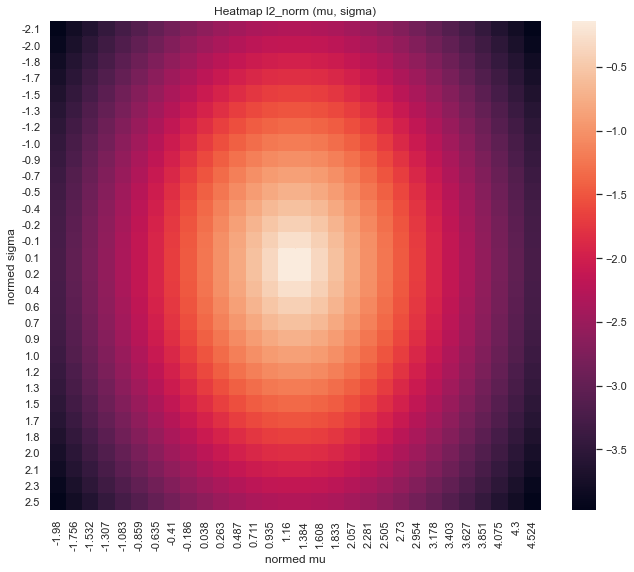

In [325]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(l2_norm, annot=False)
#name = 'l2_-norm(' + str(fix_vector.get('mu').iloc[0])+ ', (' + str(fix_vector.get('Sigma').iloc[0]) + ')))'
name = "Heatmap l2_norm (mu, sigma)"
ax.set(xlabel='normed mu', ylabel='normed sigma', title=name)
# ax = f.gca()
# circle1 = plt.Circle((size/2,size/2), 0.5, color='g', fill=False, label="The zone of the fix vector")
# ax.add_patch(circle1)
# ax.legend()
f.savefig("l2_norm((Sigma), (mu))")

### Взвешенная сумма нормы и лосса в зависимости от константы 2D (Sigma, mu)

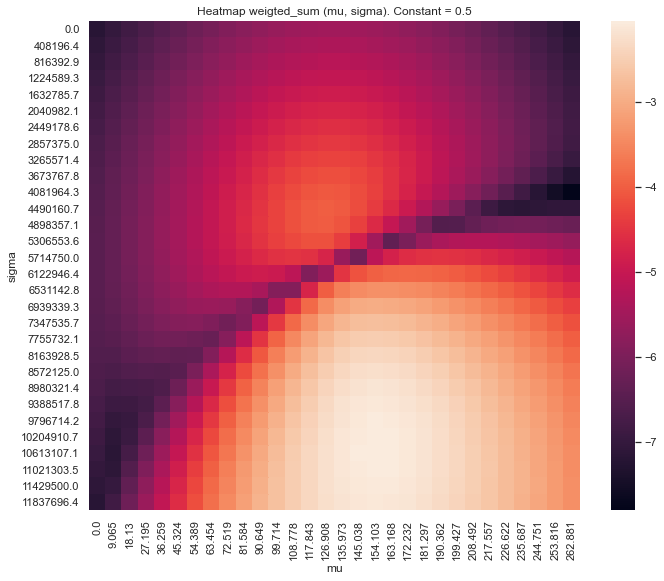

In [326]:
constant = 0.5
tmp_l2 = l2_norm
tmp_l2.index = log_loss.index
tmp_l2.columns = log_loss.columns
weighted_sum = tmp_l2 + constant * log_loss

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(weighted_sum, annot=False)
#name = 'l2_-norm(' + str(fix_vector.get('mu').iloc[0])+ ', (' + str(fix_vector.get('Sigma').iloc[0]) + ')))'
name = "Heatmap weigted_sum (mu, sigma). Constant = " + str(constant) 
ax.set(xlabel='mu', ylabel='sigma', title=name)
# ax = f.gca()
# circle1 = plt.Circle((size/2,size/2), 0.5, color='g', fill=False, label="The zone of the fix vector")
# ax.add_patch(circle1)
# ax.legend()
f.savefig(name + ".png")

### Минимизация 2D функции от sigma, mu

In [301]:
def l2_norm(variable_vector):#sigma/mu
    return np.linalg.norm([ (fix_vector.get('Sigma').iloc[0] - means[0]) / stds[0] - (variable_vector[0]-means[0]) / stds[0],
                          (fix_vector.get('mu').iloc[0] - means[1]) / stds[1] - (variable_vector[1]-means[1]) / stds[1] ])

def L(variable_vector):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=variable_vector[0],
                                                                             mu=variable_vector[1])),t)  + 1e-06)
def minimization_func(variable_vector, constant=1):
    #variable_vector = [Sigma, mu]
    return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )    

In [312]:
from scipy.optimize import minimize
# minimize_result_data = pd.DataFrame(columns=['l2_norm', 'loss', 'constant', 'result_minimize'])
minimize_result_data = []
constant = np.linspace(0,10,20)
for const in constant:
    def minimization_func(variable_vector, constant=const):
    #variable_vector = [Sigma, mu]
        return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )    
    x0 = np.array([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0]])
    #res = minimize(minimization_func, x0, method='nelder-mead')
    # res = minimize(minimization_func, x0, method='BFGS',options={'disp': True, 'eps':1e-6, 'gtol':1e1})
    #res = minimize(minimization_func, x0, method='BFGS',options={'disp': True})
    #res = minimize(minimization_func, x0, method='CG',options={'disp': True, 'maxiter':100000})
    #res = minimize(minimization_func, x0, method='powell')
    res =  minimize(minimization_func, x0, method='SLSQP', bounds=((sigma_min[0][0] * stds[0] + means[0], 
                                                                    sigma_max[0][0] * stds[0] + means[0]),
                                                                   (mu_min[0][0] * stds[1] + means[1],
                                                                    mu_max[0][0] * stds[1] + means[1])),options={'disp': True,
                                                                                                                'maxiter':1e6,
                                                                                                                'ftol':1e-9})
    minimize_result_data.append({'l2_norm': l2_norm(res.x), 'log_loss': L(res.x) ,'loss': np.exp(L(res.x)), 'constant': const, 'data': res.x})
minimize_result_data = pd.DataFrame(minimize_result_data)
minimize_result_data
#print(res)
# print ('Start vector', [fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0]])
# print ('Vector after minimization', res.x)
# print ('Function value with start vector', minimization_func(x0))
# print ('now_loss_is ', np.exp(L(res.x)))
# print ('L2 norm with minim vector', l2_norm(res.x))

2021-02-17 17:27:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:27:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:27:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:27:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490501, mu=131.44055378265503),]
2021-02-17 17:27:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:27:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:27:32 INFO    : multi-lu-coil-

2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490902, mu=132.2075727124999),]
2021-02-17 17:27:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:27:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:27:50 INFO    : multi-lu-coil-mode

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4592080567276282
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 6


2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192490887, mu=150.0),]
2021-02-17 17:28:02 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:03 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:28:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192487404, mu=132.20769984172915),]
2021-02-17 17:28:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:18 INFO    : multi-lu-coil-mo

2021-02-17 17:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192533975, mu=150.0),]
2021-02-17 17:28:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:28:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192349627, mu=150.0),]
2021-02-17 17:28:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:46 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4590618188274189
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192349627, mu=150.0),]
2021-02-17 17:28:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:28:48 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:28:48 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:29:00 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192485301, mu=132.20737967222183),]
2021-02-17 17:29:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:03 INFO    : multi-lu-coil-mo

2021-02-17 17:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192823982, mu=150.0),]
2021-02-17 17:29:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:29:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19304015, mu=150.0),]
2021-02-17 17:29:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:30 INFO    : multi-lu-coil-modelling, (

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4589155809378294
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19304015, mu=150.0),]
2021-02-17 17:29:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:33 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:29:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192488143, mu=132.20835402284544),]
2021-02-17 17:29:46 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:29:48 INFO    : multi-lu-coil-mo

2021-02-17 17:29:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192218096, mu=149.99999999999986),]
2021-02-17 17:29:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-17 17:30:14 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:14 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191683376, mu=150.0),]
2021-02-17 17:30:14 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:15 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45876934303665773
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191683376, mu=150.0),]
2021-02-17 17:30:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:18 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:30:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192513309, mu=132.20784178203309),]
2021-02-17 17:30:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:32 INFO    : multi-lu-coil-mo

2021-02-17 17:30:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19330115, mu=149.99999999999994),]
2021-02-17 17:30:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4586231051503164
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6


2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19313485, mu=150.0),]
2021-02-17 17:30:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:00 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:00 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:31:12 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192493741, mu=132.2069129614935),]
2021-02-17 17:31:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:15 INFO    : multi-lu-coil-mod

2021-02-17 17:31:26 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191626479, mu=149.99999999999994),]
2021-02-17 17:31:26 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:27 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:27 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:31:28 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:31:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:31:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:28 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-17 17:31:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:41 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192869143, mu=150.0),]
2021-02-17 17:31:41 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:42 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4584768672223754
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192869143, mu=150.0),]
2021-02-17 17:31:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:45 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:31:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192497913, mu=132.2073627274633),]
2021-02-17 17:31:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:31:59 INFO    : multi-lu-coil-mod

2021-02-17 17:32:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.193698534, mu=150.0),]
2021-02-17 17:32:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:32:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:26 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192952013, mu=150.0),]
2021-02-17 17:32:26 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:27 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4583306293068355
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192952013, mu=150.0),]
2021-02-17 17:32:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:30 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:32:41 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192435314, mu=132.20645581984624),]
2021-02-17 17:32:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:44 INFO    : multi-lu-coil-mo

2021-02-17 17:32:56 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19507073, mu=150.0),]
2021-02-17 17:32:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:32:57 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.194

2021-02-17 17:33:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.193357494, mu=150.0),]
2021-02-17 17:33:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:12 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4581843914536936
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.193357494, mu=150.0),]
2021-02-17 17:33:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:15 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:33:26 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192588076, mu=132.20795215711215),]
2021-02-17 17:33:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:29 INFO    : multi-lu-coil-mo

2021-02-17 17:33:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.193741066, mu=150.0),]
2021-02-17 17:33:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:42 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:33:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195067593, mu=150.0),]
2021-02-17 17:33:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:55 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:55 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:55 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:56 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4580381534721991
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195067593, mu=150.0),]
2021-02-17 17:33:57 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:33:58 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:33:58 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:34:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1925005345, mu=132.20736117371604),]
2021-02-17 17:34:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:12 INFO    : multi-lu-coil-m

2021-02-17 17:34:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1945743505, mu=149.99999999999994),]
2021-02-17 17:34:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:25 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, si

2021-02-17 17:34:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19502106, mu=150.0),]
2021-02-17 17:34:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:39 INFO    : multi-lu-coil-modelling, (

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4578919156234142
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19502106, mu=150.0),]
2021-02-17 17:34:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:41 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:34:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19247064, mu=132.20735865404308),]
2021-02-17 17:34:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:34:55 INFO    : multi-lu-coil-mod

2021-02-17 17:35:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.190327528, mu=150.0),]
2021-02-17 17:35:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:35:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191896345, mu=150.0),]
2021-02-17 17:35:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:22 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45774567767021135
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191896345, mu=150.0),]
2021-02-17 17:35:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:25 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:25 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:35:36 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1925419895, mu=132.20742446621065),]
2021-02-17 17:35:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:38 INFO    : multi-lu-coil-m

2021-02-17 17:35:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.194320752, mu=149.99999999999997),]
2021-02-17 17:35:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:35:51 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-17 17:36:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19360494, mu=150.0),]
2021-02-17 17:36:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:05 INFO    : multi-lu-coil-modelling, (

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45759943985038076
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19360494, mu=150.0),]
2021-02-17 17:36:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:08 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:36:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192552531, mu=132.20900936455394),]
2021-02-17 17:36:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:21 INFO    : multi-lu-coil-mo

2021-02-17 17:36:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195526556, mu=150.0),]
2021-02-17 17:36:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:36:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195500445, mu=150.0),]
2021-02-17 17:36:46 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:48 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4574532018634961
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195523299, mu=150.0),]
2021-02-17 17:36:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:36:55 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:36:55 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:37:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192453282, mu=132.20930645850598),]
2021-02-17 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:09 INFO    : multi-lu-coil-mo

2021-02-17 17:37:20 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.196164028, mu=149.99999999999991),]
2021-02-17 17:37:20 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:37:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sig

2021-02-17 17:37:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:37:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.196172854, mu=149.99999999999991),]
2021-02-17 17:37:34 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:37:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:37:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:35 INFO    : multi-lu-co

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45730696394748516
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.196165179, mu=149.99999999999991),]
2021-02-17 17:37:41 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:42 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:42 INFO    : multi-lu-coil-mod

2021-02-17 17:37:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192440166, mu=132.2068272086938),]
2021-02-17 17:37:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:37:56 INFO    : multi-lu-coil-mod

2021-02-17 17:38:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.188079732, mu=150.0),]
2021-02-17 17:38:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:38:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.18

2021-02-17 17:38:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:38:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.188098109, mu=150.0),]
2021-02-17 17:38:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:38:24 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.457160726301333
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.18808201, mu=150.0),]
2021-02-17 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:38:33 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:38:33 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:38:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192503907, mu=132.2100693566607),]
2021-02-17 17:38:46 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:38:48 INFO    : multi-lu-coil-mod

2021-02-17 17:38:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.191911102, mu=150.0),]
2021-02-17 17:38:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:39:00 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:39:16 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:39:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1914784135, mu=150.0),]
2021-02-17 17:39:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45701448828006214
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6


2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.1914784135, mu=150.0),]
2021-02-17 17:39:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:39:19 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:39:19 INFO    : multi-lu-coil-modelling, (int

2021-02-17 17:39:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192473451, mu=132.21047128236512),]
2021-02-17 17:39:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:39:33 INFO    : multi-lu-coil-mo

2021-02-17 17:39:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.195343115, mu=150.0),]
2021-02-17 17:39:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:39:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:40:00 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:00 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19364643, mu=150.0),]
2021-02-17 17:40:00 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:01 INFO    : multi-lu-coil-modelling, (

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.456868250344336
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19364643, mu=150.0),]
2021-02-17 17:40:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:04 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:04 INFO    : multi-lu-coil-modelling, (inter

2021-02-17 17:40:17 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192754548, mu=132.20801156697746),]
2021-02-17 17:40:18 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:20 INFO    : multi-lu-coil-mo

2021-02-17 17:40:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.203938936, mu=149.9999999999999),]
2021-02-17 17:40:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:34 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigm

2021-02-17 17:40:48 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.198163892, mu=150.0),]
2021-02-17 17:40:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:50 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45672201224332104
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


2021-02-17 17:40:51 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:40:52 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:40:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:40:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:40:52 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.198163892, mu=150.0),]
2021-02-17 17:40:52 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:40:53 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:40:53 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:41:09 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192541801, mu=132.20509462316494),]
2021-02-17 17:41:10 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:41:12 INFO    : multi-lu-coil-mo

2021-02-17 17:41:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.189958341, mu=150.0),]
2021-02-17 17:41:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:41:26 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.18

2021-02-17 17:41:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:41:39 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.189970518, mu=150.0),]
2021-02-17 17:41:39 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:41:41 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.45657577439001246
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.189959885, mu=150.0),]
2021-02-17 17:41:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:41:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:41:49 INFO    : multi-lu-coil-modelling, (inte

2021-02-17 17:42:01 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.192743354, mu=132.20903011551815),]
2021-02-17 17:42:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:42:04 INFO    : multi-lu-coil-mo

2021-02-17 17:42:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.198544684, mu=150.0),]
2021-02-17 17:42:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:42:18 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.19

2021-02-17 17:42:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:42:32 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.198520531, mu=150.0),]
2021-02-17 17:42:32 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:42:34 INFO    : multi-lu-coil-modelling, 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4564295363149745
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.905936678841285, th0=6.5, sigma=5918848.198541649, mu=150.0),]
2021-02-17 17:42:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-17 17:42:41 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-17 17:42:41 INFO    : multi-lu-coil-modelling, (inte

,l2_norm,log_loss,loss,constant,data
0,0.459208,0.000278,1.000278,0.000000,"[5918848.192490887, 150.0]"
1,0.459208,0.000278,1.000278,0.526316,"[5918848.192349627, 150.0]"
2,0.459208,0.000278,1.000278,1.052632,"[5918848.19304015, 150.0]"
3,0.459208,0.000278,1.000278,1.578947,"[5918848.191683376, 150.0]"
4,0.459208,0.000278,1.000278,2.105263,"[5918848.19313485, 150.0]"
5,0.459208,0.000278,1.000278,2.631579,"[5918848.192869143, 150.0]"
6,0.459208,0.000278,1.000278,3.157895,"[5918848.192952013, 150.0]"
7,0.459208,0.000278,1.000278,3.684211,"[5918848.193357494, 150.0]"
8,0.459208,0.000278,1.000278,4.210526,"[5918848.195067593, 150.0]"
9,0.459208,0.000278,1.000278,4.736842,"[5918848.19502106, 150.0]"


In [315]:
minimize_result_data

,l2_norm,log_loss,loss,constant,data
0,0.459208,0.000278,1.000278,0.000000,"[5918848.192490887, 150.0]"
1,0.459208,0.000278,1.000278,0.526316,"[5918848.192349627, 150.0]"
2,0.459208,0.000278,1.000278,1.052632,"[5918848.19304015, 150.0]"
3,0.459208,0.000278,1.000278,1.578947,"[5918848.191683376, 150.0]"
4,0.459208,0.000278,1.000278,2.105263,"[5918848.19313485, 150.0]"
5,0.459208,0.000278,1.000278,2.631579,"[5918848.192869143, 150.0]"
6,0.459208,0.000278,1.000278,3.157895,"[5918848.192952013, 150.0]"
7,0.459208,0.000278,1.000278,3.684211,"[5918848.193357494, 150.0]"
8,0.459208,0.000278,1.000278,4.210526,"[5918848.195067593, 150.0]"
9,0.459208,0.000278,1.000278,4.736842,"[5918848.19502106, 150.0]"


In [17]:
res

NameError: name 'res' is not defined

In [294]:
 sigma_max[0][0] * stds[0] + means[0]

10000000.0

## Heatmap with loss from net

In [ ]:
def L(variable_vector):
    tensor = torch.tensor([fix_vector.get('Sigma').iloc[0],variable_vector[0],
                           fix_vector.get('mu').iloc[0],variable_vector[1],
                           fix_vector.get('th').iloc[0],fix_vector.get('th').iloc[0]])
    tensor = tensor.to(device)
    output = net(tensor.double())
    #print (output.item())
    return ((output.item()))

In [ ]:
size = 30
x = np.linspace(1e-06, 2 * fix_vector.get('Sigma').iloc[0], num=size, retstep=True)#sigma
y = np.linspace(1e-06, 2 * fix_vector.get('mu').iloc[0], num=size, retstep=True)#mu
i = 0
j = 0
loss = np.zeros((size,size))
while (i < size):
    while (j < size):
        loss[i][j] = L(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1
log_loss_net = pd.DataFrame(loss)
log_loss_net.index = np.around(x,1) 
log_loss_net.columns = np.around(y,3)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(log_loss_net, annot=False, vmin=-10, vmax=-3)
name = "from net log (loss (mu, sigma))"
ax.set(xlabel='mu', ylabel='sigma', title=name)
f.savefig("loss_from_net((Sigma), (mu))")

### 2D loss(sigma/th)

In [287]:
# def l2_norm(x,y):#sigma/th
#     return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - x,
#                           fix_vector.get('th').iloc[0] - y])

# def L(x,y):
#     return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=x,
#                                                                              th=y)),t))
# def minimization_func(x,y, constant=1):
#     #variable_vector = [Sigma, th]
#     return (-1 * l2_norm(x,y) + constant * L(x,y) )

# size = 10
# x = np.linspace(-2 * fix_vector.get('Sigma').iloc[0], 2 * fix_vector.get('Sigma').iloc[0], size)#sigma
# y = np.linspace(-2 * fix_vector.get('th').iloc[0], 2 * fix_vector.get('th').iloc[0], size)#mu
# i = 0
# j = 0
# z = np.zeros((size,size))
# while (i < size):
#     while (j < size):
#         z[i][j] = minimization_func(x[i],y[j])
#         j = j + 1
#     j = 0
#     i = i + 1
# #Z = minimization_func(X,Y)

In [286]:
# z_data = pd.DataFrame(z)
# fig = go.Figure(data=[go.Surface(z=z_data.values)])

# fig.update_layout(title='minimimzation_function(Sigma,th)', autosize=False,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.update_layout(scene = dict(
# xaxis_title = 'sigma',
# yaxis_title = 'th',
# zaxis_title = 'minimimzation_function(sigma/th)'))
# fig.show()

### 2D loss (mu, th)

In [284]:
# def l2_norm(x,y):#mu/th
#     return np.linalg.norm([fix_vector.get('mu').iloc[0] - x,
#                           fix_vector.get('th').iloc[0] - y])

# def L(x,y):
#     return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(mu=x,
#                                                                              th=y)),t))
# def minimization_func(x,y, constant=1):
#     #variable_vector = [mu, th]
#     return (-1 * l2_norm(x,y) + constant * L(x,y) )

# size = 10
# x = np.linspace(-2 * fix_vector.get('mu').iloc[0], 2 * fix_vector.get('mu').iloc[0], size)#sigma
# y = np.linspace(-2 * fix_vector.get('th').iloc[0], 2 * fix_vector.get('th').iloc[0], size)#mu
# i = 0
# j = 0
# z = np.zeros((size,size))
# while (i < size):
#     while (j < size):
#         z[i][j] = minimization_func(x[i],y[j])
#         j = j + 1
#     j = 0
#     i = i + 1
# #Z = minimization_func(X,Y)

In [285]:
# z_data = pd.DataFrame(z)
# fig = go.Figure(data=[go.Surface(z=z_data.values)])

# fig.update_layout(title='minimimzation_function(mu,th)', autosize=False,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.update_layout(scene = dict(
# xaxis_title = 'mu',
# yaxis_title = 'th',
# zaxis_title = 'minimimzation_function(mu/th)'))
# fig.show()

## Минимизация модельной функции